In [127]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FastICA
from scipy.stats import multivariate_normal, norm
import numpy as np
import operator
import itertools
import matplotlib.pyplot as plt

In [2]:
class NaiveBayesClassifier:
    def __init__(self, verbose = False):
        self._verbose = verbose
    
    def fit(self, X, y):
        self._X = X
        self._y = y
        self._n = y.shape[0]
        
        self._priori_prob = {}
        class_counts = np.unique(self._y, return_counts=True)
        self._cat = class_counts[0]
        
        class_count_map = {class_counts[0][i]:class_counts[1][i] for i in range(class_counts[0].shape[0])}
        if self._verbose:
            print('priori:')
        for cls, count in zip(class_counts[0], class_counts[1]):
            self._priori_prob[cls] = count / self._n
            if self._verbose:
                print('    P({})={}'.format(cls, self._priori_prob[cls]))
        
        if self._verbose:
            print('evidence:')
        self._evidence_prob = [{} for col in range(self._X.shape[1])]
        evidence_counts = [np.unique(self._X[:, col], return_counts=True) for col in range(self._X.shape[1])]
        for col in range(self._X.shape[1]):
            evidence_counts = np.unique(self._X[:, col], return_counts=True)
            for x, count in zip(evidence_counts[0], evidence_counts[1]):
                self._evidence_prob[col][x] = count / self._n
                if self._verbose:
                    print('    col:{}, p({})={}'.format(col ,x, self._evidence_prob[col][x]))
        
        if self._verbose:
            print('class likelihood:')
        self._class_likelihood_prob = [{} for col in range(self._X.shape[1])]
        for col in range(self._X.shape[1]):
            temp = [(self._X[i, col], self._y[i]) for i in range(self._n)]
            class_likilihood_counts = np.unique(temp, axis = 0, return_counts=True)
            for pair, count in zip(class_likilihood_counts[0], class_likilihood_counts[1]):
                self._class_likelihood_prob[col][(pair[0], pair[1])] = count / class_count_map[pair[1]]
                if self._verbose:
                    print('    col:{}, p({}|{})={}'.format(col ,pair[0], pair[1], self._class_likelihood_prob[col][(pair[0], pair[1])]))
        return self

    def predict(self, x):
        posterior_prob = np.zeros(self._cat.shape[0])
        if self._verbose:
            print('posterior:')
        for i in range(self._cat.shape[0]):
            class_likelihood = 1
            evidence = 1
            for col in range(x.shape[0]):
                pair = (x[col], self._cat[i])
                class_likelihood *= self._class_likelihood_prob[col][pair]
                evidence *= self._evidence_prob[col][x[col]]
            posterior_prob[i] = self._priori_prob[self._cat[i]] * class_likelihood / evidence
            if self._verbose:
                print('    P({}|{})={}'.format(self._cat[i], x, posterior_prob[i]))
        max_prob_idx = np.argmax(posterior_prob)
        if self._verbose:
            print('predict: {}'.format(self._cat[max_prob_idx]))
        return self._cat[max_prob_idx]

In [3]:
X = [['R', 's'], ['B', 'c'], ['G', 's'], ['B', 's'],['B', 's'],['B', 'c'],['R', 's'],['G', 'c'],['G', 's'],['B', 'c'],['B', 's'],['R', 's']]
y = ['+', '+', '+', '-', '-', '+', '+','-','+','-','+','-']
X = np.array(X)
y = np.array(y)
nbc = NaiveBayesClassifier(verbose=True)
nbc.fit(X, y)
nbc.predict(np.array(['B','s']))

priori:
    P(+)=0.5833333333333334
    P(-)=0.4166666666666667
evidence:
    col:0, p(B)=0.5
    col:0, p(G)=0.25
    col:0, p(R)=0.25
    col:1, p(c)=0.3333333333333333
    col:1, p(s)=0.6666666666666666
class likelihood:
    col:0, p(B|+)=0.42857142857142855
    col:0, p(B|-)=0.6
    col:0, p(G|+)=0.2857142857142857
    col:0, p(G|-)=0.2
    col:0, p(R|+)=0.2857142857142857
    col:0, p(R|-)=0.2
    col:1, p(c|+)=0.2857142857142857
    col:1, p(c|-)=0.4
    col:1, p(s|+)=0.7142857142857143
    col:1, p(s|-)=0.6
posterior:
    P(+|['B' 's'])=0.5357142857142858
    P(-|['B' 's'])=0.45
predict: +


'+'

# 1

In [156]:
X_1 = [[1*np.cos((2*np.pi*k)/24), 1*np.sin((2*np.pi*k)/24), 0] for k in range(0, 24)]
X_1 += [[2*np.cos((2*np.pi*k)/24), 2*np.sin((2*np.pi*k)/24), 1] for k in range(0, 24)]
X_1 = np.array(X_1)
X_1, y_1 = X_1[:, [0,1]], X_1[:, -1]
for i, (x, y) in enumerate(zip(X_1, y_1)):
    print(i, i%24, x, y)

0 0 [1. 0.] 0.0
1 1 [0.96592583 0.25881905] 0.0
2 2 [0.8660254 0.5      ] 0.0
3 3 [0.70710678 0.70710678] 0.0
4 4 [0.5       0.8660254] 0.0
5 5 [0.25881905 0.96592583] 0.0
6 6 [6.123234e-17 1.000000e+00] 0.0
7 7 [-0.25881905  0.96592583] 0.0
8 8 [-0.5        0.8660254] 0.0
9 9 [-0.70710678  0.70710678] 0.0
10 10 [-0.8660254  0.5      ] 0.0
11 11 [-0.96592583  0.25881905] 0.0
12 12 [-1.0000000e+00  1.2246468e-16] 0.0
13 13 [-0.96592583 -0.25881905] 0.0
14 14 [-0.8660254 -0.5      ] 0.0
15 15 [-0.70710678 -0.70710678] 0.0
16 16 [-0.5       -0.8660254] 0.0
17 17 [-0.25881905 -0.96592583] 0.0
18 18 [-1.8369702e-16 -1.0000000e+00] 0.0
19 19 [ 0.25881905 -0.96592583] 0.0
20 20 [ 0.5       -0.8660254] 0.0
21 21 [ 0.70710678 -0.70710678] 0.0
22 22 [ 0.8660254 -0.5      ] 0.0
23 23 [ 0.96592583 -0.25881905] 0.0
24 0 [2. 0.] 1.0
25 1 [1.93185165 0.51763809] 1.0
26 2 [1.73205081 1.        ] 1.0
27 3 [1.41421356 1.41421356] 1.0
28 4 [1.         1.73205081] 1.0
29 5 [0.51763809 1.93185165] 1.0
30 6

In [150]:
class MyKNeighborsClassifier:
    
    def __init__(self, n_neighbors=3, **kwargs):
        self._k = n_neighbors
        self._X = self._y = None
        self.set_params(**kwargs)
            
    def get_params(self, deep=True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return self.__dict__

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y):
        self._X = X.copy()
        self._y = y.copy()
    
    def _predict(self, x):
        distances = np.apply_along_axis(lambda x1: np.linalg.norm(x-x1), 
                                        1, self._X)
        
        X_candidates = np.argsort(distances)[:self._k]
        y_candidates = self._y[X_candidates]
        print(X_candidates ,
              self._X[X_candidates], 
              distances[X_candidates], 
              y_candidates)
        return np.argmax(np.bincount(y_candidates.astype('int64')))
    
    def score(self, X, y_true):
        return accuracy_score(y_true, self.predict(X))
    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self._predict(x), 1, X)

In [151]:
model_1 = MyKNeighborsClassifier()
model_1.fit(X_1, y_1)

In [152]:
model_1.predict(np.array([[np.sqrt(2), np.sqrt(2)]]).reshape(-1,2))

[27 28 26] [[1.41421356 1.41421356]
 [1.         1.73205081]
 [1.73205081 1.        ]] [2.22044605e-16 5.22104769e-01 5.22104769e-01] [1. 1. 1.]


array([1])

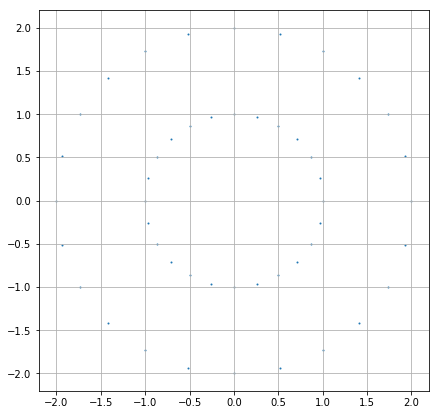

In [153]:
fig = plt.figure(figsize=(7,7))
plt.grid()
plt.scatter(X_1[:,0], X_1[:,1], y)

plt.show()

# 2

In [157]:
class MyGaussianNB:
    
    def __init__(self, **kwargs):
        self._class = {}
        self.set_params(**kwargs)
   
    def get_params(self, deep=True):
        return self.__dict__

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self):      
        self._class['0'] = {}
        self._class['0']['mean'] = np.array([0,0])
        self._class['0']['var'] = np.array([1,1])
        self._class['0']['prior'] = (0.333)
        
        self._class['1'] = {}
        self._class['1']['mean'] = np.array([1,1])
        self._class['1']['var'] = np.array([2,2])
        self._class['1']['prior'] = (0.333)
        
        self._class['2'] = {}
        self._class['2']['mean'] = np.array([-1,-1])
        self._class['2']['var'] = np.array([3,3])
        self._class['2']['prior'] = (0.333)
    
    def _likelihood(self, v, feature_index, Ck):
        var = self._class[Ck]['var'][feature_index]
        mean = self._class[Ck]['mean'][feature_index]
        exp = np.exp((-1 * (v - mean)**2) / (2 * var**2))
        return (1 / (np.sqrt(2 * np.pi * var**2))) * exp
        
    def _predict(self, x):
        class_prob = {Ck:None for Ck in self._class.keys()}
        
        for Ck, v in class_prob.items():
            prior = self._class[Ck]['prior']
            class_prob[Ck] = prior
            for i, xn in enumerate(x):
                print('P(x%d|C%s)=%f'%(i, Ck, self._likelihood(xn, i, Ck)))
                class_prob[Ck] *= self._likelihood(xn, i, Ck)
                
        print(class_prob)
        result = sorted(class_prob.items(), 
                        key=operator.itemgetter(1), 
                        reverse=True)
        return result[0][0]
    
    def score(self, X, y_true):
        return accuracy_score(y_true, self.predict(X))
    
    def predict(self, X):
        return np.apply_along_axis(lambda x: self._predict(x), 1, X)
model_2 = MyGaussianNB()
model_2.fit()

In [158]:
model_2._predict([-1, 1])

P(x0|C0)=0.241971
P(x1|C0)=0.241971
P(x0|C1)=0.120985
P(x1|C1)=0.199471
P(x0|C2)=0.132981
P(x1|C2)=0.106483
{'0': 0.019497093897598284, '1': 0.00803631835645199, '2': 0.004715328684332738}


'0'

In [89]:
0.33*0.2419*0.2419

0.0193101513

Bayesian probability
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/52bd0ca5938da89d7f9bf388dc7edcbd546c118e)

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution.
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/951ea9195fc8021652c0e57d17c8819f78b0d452)

The joint model can be expressed as
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1ade28a9aa4113ba19fa82b9f94be76bc37bce0)

We difine classifier like this ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/5ed52009429e5f3028302427a067822fdfc58059)

# 3

In [90]:
def sort_eig(eigvals, eigvertor):
    sort_mask = np.argsort(np.abs(eigvals))[::-1]
    return eigvals[sort_mask], eigvertor[:, sort_mask]

In [164]:
eigvals = np.array([1, 0.5, 0.02, 0.01])
eigvertor = np.array([[0.5, 0.5, 0.5, 0.5], 
                      [0.707, 0, 0, 0.707],
                      [0, 0.9, 0.3, 0.316],
                      [0.5, 0, 0.5, 0.707]]).T

In [165]:
eigvals, eigvertor = sort_eig(eigvals, eigvertor)

In [166]:
np.cumsum(eigvals)/ np.sum(eigvals)

array([0.65359477, 0.98039216, 0.99346405, 1.        ])

In [167]:
eigvals

array([1.  , 0.5 , 0.02, 0.01])

In [168]:
eigvertor

array([[0.5  , 0.707, 0.   , 0.5  ],
       [0.5  , 0.   , 0.9  , 0.   ],
       [0.5  , 0.   , 0.3  , 0.5  ],
       [0.5  , 0.707, 0.316, 0.707]])

In [169]:
np.array([[1, 1, 0.5, 0.5]]).dot(eigvertor[:, :2])

array([[1.5   , 1.0605]])

# 4

In [107]:
feature_names = ['outlook', 'temp', 'humidity', 'windy']

In [98]:
data_y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [103]:
data_X = np.array([['sunny',    85, 85, 0],
                   ['sunny',    80, 90, 1],
                   ['overcast', 83, 78, 0],
                   ['rain',     70, 96, 0],
                   ['rain',     68, 80, 0],
                   ['rain',     65, 70, 1],
                   ['overcast', 64, 65, 1],
                   ['sunny',    72, 95, 0],
                   ['sunny',    69, 70, 0],
                   ['rain',     75, 80, 0],
                   ['sunny',    75, 70, 1],
                   ['overcast', 72, 90, 1],
                   ['overcast', 81, 75, 0],
                   ['rain',     71, 80, 1]])
temper_mask = data_X[:, 1].astype('int')
data_X[:, 1][temper_mask > 70] = 'hot'
data_X[:, 1][temper_mask <=70] = 'warn'

In [101]:
#data_X = data_X[:, 1]

In [104]:
data_X

array([['sunny', 'hot', '85', '0'],
       ['sunny', 'hot', '90', '1'],
       ['overcast', 'hot', '78', '0'],
       ['rain', 'warn', '96', '0'],
       ['rain', 'warn', '80', '0'],
       ['rain', 'warn', '70', '1'],
       ['overcast', 'warn', '65', '1'],
       ['sunny', 'hot', '95', '0'],
       ['sunny', 'warn', '70', '0'],
       ['rain', 'hot', '80', '0'],
       ['sunny', 'hot', '70', '1'],
       ['overcast', 'hot', '90', '1'],
       ['overcast', 'hot', '75', '0'],
       ['rain', 'hot', '80', '1']], dtype='<U8')

In [176]:
def entropy(S):
    n = S.shape[0]
    En = 0
    for u, count in zip(*np.unique(S, return_counts=True)):
        En += -1*(count/n)*np.log2(count/n)
    return En
#entropy(data_y)

In [177]:
def gain(S, T):
    En = entropy(S)
    #print('En %f'%(En))
    n = S.shape[0]
    temp = []
    for u, count in zip(*np.unique(T, return_counts=True)):
        temp.append((count/n)*entropy(S[T == u]))
        En -= (count/n)*entropy(S[T == u])
    print('temp %f'%(np.sum(temp)))
    return En

# for i, name in enumerate(feature_names):
#     print('gain for "%10s": %f'%(name, gain(data_y, data_X[:, i])))

In [178]:
def split_info(S, T):
    spt_info = 0
    n = S.shape[0]
    for u, count in zip(*np.unique(T, return_counts=True)):
        spt_info += -1*(count/n)*np.log2(count/n)
    return spt_info

# for i, name in enumerate(feature_names):
#     print('split_info for "%10s": %f'%(name, split_info(data_y, data_X[:, i]))) 

In [179]:
def gain_ratio(S, T):
    #print('gain %f'%(gain(S, T)))
    #print('split_info %f'%(split_info(S, T)))
    return gain(S, T)/split_info(S, T)

# for i, name in enumerate(feature_names):
#     print('gain_ratio for "%10s": %f'%(name, gain_ratio(data_y, data_X[:, i]))) 

In [180]:
for i, name in enumerate(feature_names):
    print('gain_ratio for "%10s": %f'%(name, gain_ratio(data_y, data_X[:, i]))) 

temp 0.693536
gain_ratio for "   outlook": 0.156428
temp 0.894952
gain_ratio for "      temp": 0.048213
temp 0.536413
gain_ratio for "  humidity": 0.135291
temp 0.892159
gain_ratio for "     windy": 0.048849


In [181]:
0.940286-0.894952

0.045333999999999985

# 5

In [116]:
0.5*0.5+0.5*0.5


0.5

In [117]:
-0.2*0.7*0.3*0.5

-0.020999999999999998

In [119]:
t = 0.7*0.3*0.5*0.5

In [120]:
t*(-0.2)

-0.0105

In [121]:
0.3*0.4*0.6*0.5*0.5

0.018

In [122]:
0.018-0.0105

0.007499999999999998

In [123]:
0.5*0.5+0.5*-0.6

-0.04999999999999999

In [124]:
-0.2*0.7*0.3*-0.05

0.0021

In [125]:
0.3*0.4*0.6*0.5*-0.6

-0.021599999999999998

In [126]:
(0.3*0.4*0.6*0.5*-0.6)-0.0105

-0.0321